# 94. ビーム探索
91で学習したニューラル機械翻訳モデルで翻訳文をデコードする際に，ビーム探索を導入せよ．ビーム幅を1から100くらいまで適当に変化させながら，開発セット上のBLEUスコアの変化をプロットせよ．

## GPU prepare
1. 使用可能GPUの確認
2. GPUの指定
3. PyTorchで利用できるGPU数の確認
4. deviceの指定

In [1]:
# 使用可能GPUの確認
!nvidia-smi

Fri Aug  5 16:06:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    On   | 00000000:01:00.0 Off |                  Off |
| 30%   45C    P2    80W / 300W |   1463MiB / 48685MiB |     19%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A6000    On   | 00000000:25:00.0 Off |                  Off |
| 30%   

In [2]:
# GPUの指定
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' #0番を使用するとき

In [3]:
# 確認
import torch
print(torch.cuda.device_count()) #Pytorchで使用できるGPU数を取得

1


## BLEUスコアの計測
1. devデータの翻訳
2. BLEUスコアの計測
3. 結果のプロット

In [4]:
%%bash
export CUDA_VISIBLE_DEVICES=1
for N in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-interactive --path ../data/ch10/91_trained/checkpoint_best.pt --beam $N ../data/ch10/91_preprocessed < ../data/ch10/90_dev_tokens.ja | grep '^H' | cut -f3 > ../data/ch10/94_dev_transformed_$N.en
done

2022-08-05 16:06:35 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 16:06:36 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging

In [12]:
%%bash
export CUDA_VISIBLE_DEVICES=1
for N in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-score --sys ../data/ch10/94_dev_transformed_$N.en --ref ../data/ch10/90_dev_tokens.en > ../data/ch10/94_bleu_$N.txt
done

2022-08-05 17:11:31 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:32 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:34 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:36 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:38 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:39 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:41 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:43 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-08-05 17:11:44 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX:

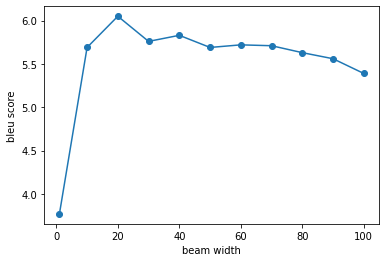

In [11]:
import matplotlib.pyplot as plt
import re

beams = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bleus = []
for i in beams:
    with open('../data/ch10/94_bleu_' + str(i) + '.txt') as f:
        x = f.readlines()[1]
        bleus.append(float(re.search(r'(BLEU4 = )(\d*\.\d*)(,)', x)[2]))

plt.plot(beams, bleus, marker="o")
plt.xlabel('beam width')
plt.ylabel('bleu score')
plt.show()